# Gráfico que muestre el porcentaje de partidas finalizadas según género.
Primero importo las librerias necesarias para obtener la estadistica y abro los archivos

In [8]:
from matplotlib import pyplot as plt
import pandas as pd
import os
import json

#Abro los eventos
ruta = os.path.join(os.getcwd(), '..', 'src', 'datos', 'eventos_partidas.csv')
data_set = pd.read_csv(ruta, encoding='utf-8')

#Abro los perfiles
with open(os.path.join(os.getcwd(), "..", "src", "datos", "perfiles.json"), "r", encoding='utf-8') as perfiles:
    jugadores = json.load(perfiles)

Obtengo los usuarios que finalizaron y obtengo el género de los usuarios, al recorrer las partidas finalizadas aumento los contadores

In [17]:
#Obtengo los eventos finalizados por usuario
data_set = data_set[["evento","estado", "usuarie"]]
data_set = data_set[data_set["evento"] == "fin"]

df_usuarios = pd.DataFrame.from_dict(jugadores)
df_usuarios = df_usuarios.rename(columns = {'nick':'usuarie'})


nuevo_df = pd.merge(data_set,df_usuarios,on="usuarie")
print(nuevo_df)

  evento      estado  usuarie  edad  genero
0    fin   cancelada  hombre2    20  Hombre
1    fin  finalizado  hombre2    20  Hombre
2    fin  finalizado    anita    20   Mujer
3    fin  finalizado    anita    20   Mujer
4    fin  finalizado    anita    20   Mujer


In [18]:
por_genero = nuevo_df.groupby(["genero", "estado"])["genero"].size()
print(por_genero) 

genero  estado    
Hombre  cancelada     1
        finalizado    1
Mujer   finalizado    3
Name: genero, dtype: int64


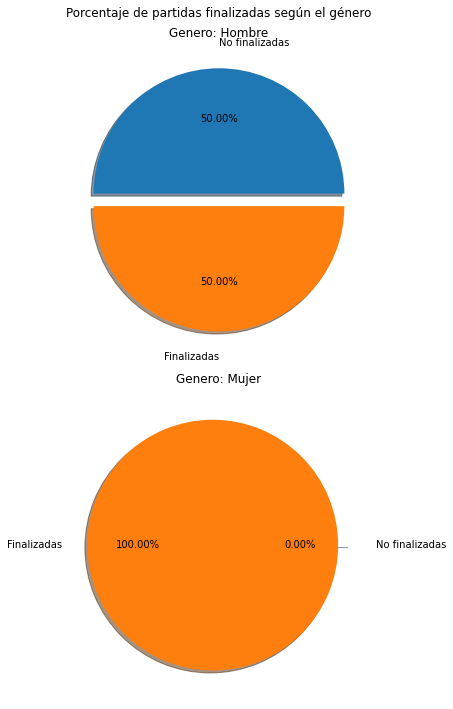

In [35]:
etiquetas = ["No finalizadas","Finalizadas"] 

generos = nuevo_df["genero"].unique()

if len(generos) > 5: cant_graficos = 5
else: cant_graficos = len(generos)

figure, axis = plt.subplots(nrows=cant_graficos, ncols=1, figsize=(10, 10))

grafico = 0
for genero in generos:
    if not 'cancelada' in por_genero[genero].keys():
        axis[grafico].pie([0, por_genero[genero]["finalizado"]],explode = (0.05, 0.05), labeldistance=1.2, labels=etiquetas, autopct='%1.2f%%', shadow=True)
    else:
        if not 'finalizado' in por_genero[genero].keys():
            axis[grafico].pie([por_genero[genero]["cancelada"], 0],explode = (0.05, 0.05), labeldistance=1.2, labels=etiquetas, autopct='%1.2f%%', shadow=True)
        else:
            axis[grafico].pie([por_genero[genero]["cancelada"], por_genero[genero]["finalizado"]],explode = (0.05, 0.05), labeldistance=1.2, labels=etiquetas, autopct='%1.2f%%', shadow=True)
    
    axis[grafico].set_title('Genero: '+genero) 
    grafico += 1

figure.suptitle('Porcentaje de partidas finalizadas según el género')
figure.tight_layout()
plt.show()